In [24]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 
              'comp.sys.ibm.pc.hardware', 'sci.crypt']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
print(len(newsgroups_train.data), newsgroups_train.target_names)

3219 ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [9]:
cv = CountVectorizer(token_pattern=r"[\w']{2,}", stop_words='english', min_df=3, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)
print(review_cv.shape)

(3219, 16233)


In [15]:
np.set_printoptions(precision=3)

In [13]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10, topic_word_prior=0.1, doc_topic_prior=0.1,
                                learning_method='online', n_jobs=-1, random_state=0)

In [16]:
review_topics = lda.fit_transform(review_cv)
print(review_topics.shape)
print(review_topics[0])
gross_topic_weights = np.mean(review_topics, axis=0)
print(gross_topic_weights)
print(lda.components_.shape)

(3219, 10)
[4.927e-04 4.927e-04 4.927e-04 4.927e-04 4.927e-04 4.927e-04 6.506e-02
 4.927e-04 4.927e-04 9.310e-01]
[0.131 0.024 0.11  0.152 0.114 0.047 0.222 0.031 0.094 0.075]
(10, 16233)


In [17]:
def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: {', '.join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]])}")
    print()

In [23]:
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, ftp, file, information, available, data, mail, software, graphics, use
Topic #1: db, drive, ___, disk, __, drives, cs, hard, bh, si
Topic #2: space, nasa, launch, gov, moon, orbit, earth, article, shuttle, henry
Topic #3: key, encryption, clipper, chip, government, com, use, keys, security, public
Topic #4: university, nntp, host, posting, graphics, com, thanks, know, uk, ac
Topic #5: article, islam, islamic, com, don't, fred, people, bu, law, think
Topic #6: god, people, don't, just, com, know, think, jesus, say, like
Topic #7: com, article, bear, washington, right, points, tyre, den, cs, posting
Topic #8: scsi, com, ide, drive, bus, pc, controller, card, ibm, dos
Topic #9: com, morality, keith, sgi, article, caltech, sandvik, objective, moral, think



In [25]:
def show_perplexity(cv, start=5, end=20, max_iter=10, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()

    return start + per_value.index(min(per_value))

n_components: 5, perplexity: 4267.500
n_components: 6, perplexity: 4283.333
n_components: 7, perplexity: 4230.943
n_components: 8, perplexity: 4119.894
n_components: 9, perplexity: 4093.274
n_components: 10, perplexity: 4074.340
n_components: 11, perplexity: 4067.862
n_components: 12, perplexity: 4068.820
n_components: 13, perplexity: 4096.470
n_components: 14, perplexity: 4123.096
n_components: 15, perplexity: 4117.533
n_components: 16, perplexity: 4124.580
n_components: 17, perplexity: 4166.122
n_components: 18, perplexity: 4158.197
n_components: 19, perplexity: 4190.547
n_components: 20, perplexity: 4206.886


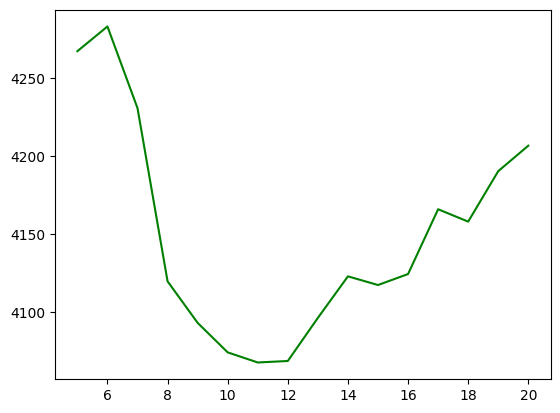

11

In [26]:
show_perplexity(review_cv)

In [27]:
lda = LatentDirichletAllocation(n_components=11, max_iter=10, topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='batch', n_jobs=-1, random_state=0)

In [28]:
review_topics = lda.fit_transform(review_cv)
print(review_topics.shape)
print(review_topics[0])
gross_topic_weights = np.mean(review_topics, axis=0)
print(gross_topic_weights)
print(lda.components_.shape)

(3219, 11)
[0.006 0.007 0.008 0.008 0.007 0.014 0.034 0.008 0.015 0.888 0.006]
[0.122 0.114 0.077 0.082 0.068 0.097 0.075 0.068 0.087 0.091 0.12 ]
(11, 16233)


In [29]:
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: graphics, image, file, ftp, available, data, files, mail, software, program
Topic #1: drive, card, university, com, disk, thanks, controller, host, nntp, bus
Topic #2: scsi, db, article, com, henry, toronto, ibm, cs, bit, ide
Topic #3: nasa, gov, article, com, just, like, people, space, don't, think
Topic #4: god, ___, atheism, posting, atheists, __, nntp, just, host, jesus
Topic #5: people, say, article, god, don't, think, jesus, christian, like, just
Topic #6: god, com, don't, does, brian, know, think, like, argument, just
Topic #7: com, key, posting, des, people, sgi, anonymous, don't, security, public
Topic #8: space, nasa, orbit, earth, launch, moon, lunar, shuttle, satellite, mission
Topic #9: com, article, keith, caltech, don't, nntp, sandvik, host, posting, morality
Topic #10: key, chip, clipper, encryption, government, com, access, use, keys, escrow

